In [23]:
!pip install bing-image-downloader

time: 3.04 s (started: 2021-08-21 08:40:02 +00:00)


In [24]:
# I am using this to check execution time of each cell
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.04 s (started: 2021-08-21 08:40:08 +00:00)


I'm making images folder for storing downloaded images from internet

In [25]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 142 ms (started: 2021-08-21 08:40:16 +00:00)


In [26]:
from bing_image_downloader import downloader
downloader.download("unfinished building", limit = 100, output_dir = 'images', adult_filter_off=True)

[%] Downloading Images to /content/images/unfinished building


[!!]Indexing page: 1

[%] Indexed 100 Images on Page 1.


[%] Downloading Image #1 from http://upload.wikimedia.org/wikipedia/commons/2/25/The_unfinished_building.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.urbanghostsmedia.com/wp-content/uploads/2017/06/Centro-Financiero-Confinanzas.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://images.adsttc.com/media/images/5b44/9aa8/f197/cce0/9700/0074/large_jpg/F1020018.jpg?1531222689
[%] File Downloaded !

[%] Downloading Image #4 from https://kubrick.htvapps.com/htv-prod-media.s3.amazonaws.com/ibmig/cms/image/wesh/19091180-19091180.jpg?crop=1xw:1.00000000000000000xh;center,top&amp;resize=1200:*
[%] File Downloaded !

[%] Downloading Image #5 from https://thumbs.dreamstime.com/b/construction-site-unfinished-house-white-brick-building-under-empty-windows-against-sky-97086118.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://kubr

In [27]:
downloader.download("completed building", limit = 100, output_dir = 'images', adult_filter_off=True)

[%] Downloading Images to /content/images/completed building


[!!]Indexing page: 1

[%] Indexed 100 Images on Page 1.


[%] Downloading Image #1 from http://www.truenorthprojects.com.au/uploads/2/6/4/6/26467724/whales-point-elevation-concept_orig.png
[%] File Downloaded !

[%] Downloading Image #2 from http://www.truenorthprojects.com.au/uploads/2/6/4/6/26467724/spire_orig.png
[%] File Downloaded !

[%] Downloading Image #3 from http://www.truenorthprojects.com.au/uploads/2/6/4/6/26467724/4646083_orig.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://images.skyscrapercenter.com/building/TrueNorthSquare_Rendering-Complex_(c)Perkins__Will-Architects__49.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.truevisionconstruction.co.nz/Portals/4/renwick-th.jpg?ver=2015-11-05-173445-927
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.newsapi.com.au/image/v1/5ad3e64d06b9eab3c0980c155e67a077?width=1024
[%] File Downloaded !

[%] Downloading Imag

In [28]:
downloader.download("construction worker", limit = 100, output_dir = 'images', adult_filter_off=True)

[%] Downloading Images to /content/images/construction worker


[!!]Indexing page: 1

[%] Indexed 100 Images on Page 1.


[%] Downloading Image #1 from http://s.thestreet.com/files/tsc/v2008/photos/contrib/uploads/residentialconstructionworkers.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://busybusy.com/wp-content/uploads/2020/03/3-min-scaled.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://img.izismile.com/img/img4/20111216/640/ny_construction_workers_640_28.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://mediaassets.wtvr.com/tribune-network/tribwtvr-files-wordpress/2018/08/constructionkid2.jpeg
[%] File Downloaded !

[%] Downloading Image #5 from https://x-default-stgec.uplynk.com/ausw/slices/4c1/ab537de11df9456cb23cbc1d7e732de9/4c101fbd2d214b46a6f80d5ef7201696/poster_d65f1aa1900f42a8b8d94a092997c2c8.png
[%] File Downloaded !

[%] Downloading Image #6 from https://fox11online.com/resources/media2/original/full/1600/center/80/7c38518

**Doing the pre processing work**

In [29]:
# Now I am doing the preprocessing work
# 1) resizing the images
# 2) flattening the images
import os
import matplotlib.pyplot as plt
import numpy as np
# library to read the images and do image processing
from skimage.io import imread
# all the images should be of same size
from skimage.transform import resize

target = []
images = []
flat_data = []

# setting the path
DATADIR = '/content/images'
# naming the categories
CATEGORIES = ['completed building', 'construction worker', 'unfinished building']

# I'm iterating through all of the above categories
for category in CATEGORIES:
  # converting the contents of CATEGORIES so that machine learning process would be easier for me
  class_num = CATEGORIES.index(category)
  # this is for iterating through all the folders and putting them in one path
  path = os.path.join(DATADIR, category)
  # this is for reading all values
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # print(img_array.shape)
    # plt.imshow(img_array)

    # resizing the images
    img_resized = resize(img_array, (150, 150, 3)) # it is normalizing the values from 0 to 1
    # flattening
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

  # converting the values into numpy arrays
  flattened_data = np.array(flat_data)
  target_data = np.array(target)
  image_data = np.array(images)

time: 1min 47s (started: 2021-08-21 08:42:58 +00:00)


In [30]:
print(len(flattened_data[0]))

67500
time: 1.11 ms (started: 2021-08-21 08:45:11 +00:00)


In [31]:
target_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

time: 7.22 ms (started: 2021-08-21 08:45:17 +00:00)


<BarContainer object of 3 artists>

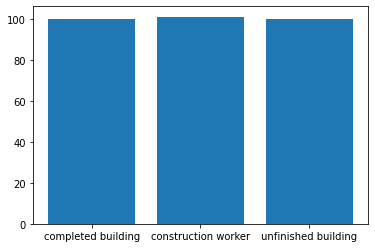

time: 148 ms (started: 2021-08-21 08:45:20 +00:00)


In [32]:
unique, count = np.unique(target_data, return_counts=True)
plt.bar(CATEGORIES, count)

**Doing the machine learning work**

In [33]:
# splitting my data into Training and Testing
# using sklearn here
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flattened_data, target_data,
                                                    test_size = 0.3, random_state=109)

time: 48.4 ms (started: 2021-08-21 08:45:26 +00:00)


In [34]:
# using GridSearchCV to identify the best parameters
from sklearn.model_selection import GridSearchCV
# importing support vector machine also
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000], 'kernel': ['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001, 0.001],'kernel': ['rbf']}
]

# enabling the probablity
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 21min 36s (started: 2021-08-21 08:45:29 +00:00)


In [35]:
# checking if the predicted value is equal to original value
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1,
       1, 2, 1])

time: 1.98 s (started: 2021-08-21 09:07:16 +00:00)


In [36]:
y_test

array([0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1,
       2, 1, 0])

time: 8.72 ms (started: 2021-08-21 09:07:22 +00:00)


In [37]:
# testing the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.3626373626373626

time: 5.84 ms (started: 2021-08-21 09:07:24 +00:00)


In [38]:
confusion_matrix(y_pred, y_test)

array([[11,  8, 10],
       [15, 11, 11],
       [ 9,  5, 11]])

time: 8.22 ms (started: 2021-08-21 09:07:27 +00:00)


In [39]:
# saving the model using pickle library
import pickle
pickle.dump(clf, open('img_model.p', 'wb'))

time: 156 ms (started: 2021-08-21 09:07:30 +00:00)


In [40]:
# loading the model using pickle
model = pickle.load(open('img_model.p', 'rb'))

time: 61 ms (started: 2021-08-21 09:07:32 +00:00)


Enter the URLhttps://i.pinimg.com/736x/9c/72/51/9c7251b83d6aa5b1a376caa3979faf64.jpg
[[[ 74  69  50]
  [ 83  66  48]
  [ 98  63  43]
  ...
  [ 57  25  10]
  [ 57  25  10]
  [ 57  25  10]]

 [[ 74  69  50]
  [ 83  66  48]
  [ 98  63  43]
  ...
  [ 57  25  10]
  [ 57  25  10]
  [ 57  25  10]]

 [[ 75  70  51]
  [ 84  67  49]
  [ 99  62  43]
  ...
  [ 57  25  10]
  [ 57  25  10]
  [ 57  25  10]]

 ...

 [[ 81  44  18]
  [ 81  44  18]
  [ 82  45  19]
  ...
  [237 222 165]
  [237 222 165]
  [237 222 165]]

 [[ 81  44  18]
  [ 81  44  18]
  [ 82  45  19]
  ...
  [237 222 165]
  [237 222 165]
  [237 222 165]]

 [[ 81  44  18]
  [ 81  44  18]
  [ 82  45  19]
  ...
  [237 222 165]
  [237 222 165]
  [237 222 165]]]
 Predicted output: construction worker


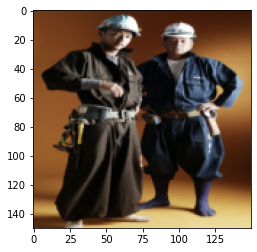

time: 3.96 s (started: 2021-08-21 09:20:00 +00:00)


In [46]:
# testing from a brand new image from google for construction worker
flat_data = []
url = input('Enter the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' Predicted output: {y_out}')

Enter the URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT11Djuzttp4Lmg2M0zuZIHRf8XzUP2tP6zkw&usqp=CAU
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[108 114 112]
  [113 117 116]
  [120 125 121]
  ...
  [ 44  43  39]
  [ 44  43  39]
  [ 44  43  39]]

 [[107 111 112]
  [105 109 110]
  [106 110 111]
  ...
  [ 50  45  42]
  [ 48  43  40]
  [ 45  40  37]]

 [[107 111 112]
  [105 109 110]
  [106 110 111]
  ...
  [ 50  45  42]
  [ 48  43  40]
  [ 45  40  37]]]
 Predicted output: completed building


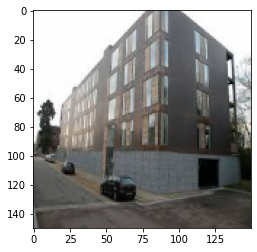

time: 4.47 s (started: 2021-08-21 09:09:24 +00:00)


In [43]:
# testing from a brand new image from google for completed building
flat_data = []
url = input('Enter the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' Predicted output: {y_out}')

Enter the URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAuYio4W6lLcNApyHTOYW2wHyhcwYQri4RRQ&usqp=CAU
[[[211 229 251]
  [211 229 251]
  [211 229 251]
  ...
  [200 225 247]
  [200 225 247]
  [200 225 247]]

 [[211 229 251]
  [211 229 251]
  [211 229 251]
  ...
  [200 225 247]
  [200 225 247]
  [200 225 247]]

 [[211 229 251]
  [211 229 251]
  [211 229 251]
  ...
  [200 225 247]
  [200 225 247]
  [200 225 247]]

 ...

 [[226 222 211]
  [228 224 213]
  [229 225 214]
  ...
  [230 223 207]
  [219 212 196]
  [203 196 180]]

 [[215 211 200]
  [220 216 205]
  [229 225 214]
  ...
  [197 191 179]
  [213 207 195]
  [231 225 213]]

 [[214 210 199]
  [228 224 213]
  [234 230 219]
  ...
  [218 216 204]
  [227 225 213]
  [236 234 222]]]
 Predicted output: unfinished building


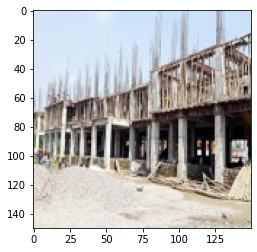

time: 4.26 s (started: 2021-08-21 09:10:33 +00:00)


In [44]:
# testing from a brand new image from google for unfinished building
flat_data = []
url = input('Enter the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' Predicted output: {y_out}')